# **US Air Pollution 2000-2016 Analysis – Visualisations**

# Exploratory Data Analysis (EDA) – US Air Pollution Data

## Objectives

* Load the cleaned US air pollution dataset.
* Explore the structure and summary statistics.
* Visualise pollution patterns.
* Enable state-level pollution to be compared.

## Hypotheses

* As environmental awareness has increased, pollution levels have decreased.
* Certain states will have made better progress than others, allowing qualitative research to be conducted to leverage best practise
* City pollution is higher than 'not in a city' on average, meaning mitigating measures should initially be urban.
* Pollution is higher at 'commute' times, meaning extra measures on commuting should be considered.

## Inputs

* cleaned_pollution_data.csv
* location_data.csv 
* Python libraries (pandas, seaborn, matplotlib, plotly)

## Outputs

* Visualisations and initial insights.


---
# Section 1 – Load the Dataset and Basic Inspection

In this section, we will:
* Load the cleaned pollution dataset.
* Preview the first rows.
* Inspect data types and missing values.
* Review summary statistics.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import ydata_profiling
from pathlib import Path


# Load the cleaned US air pollution dataset
df=pd.read_csv('cleaned_pollution_data.csv')
df.head()

Unnamed: 0                   int64
Site Num                     int64
City                        object
Date Local                  object
NO2 Mean (ppb)             float64
NO2 1st Max Value (ppb)    float64
NO2 1st Max Hour             int64
NO2 AQI                      int64
O3 Mean (ppm)              float64
O3 1st Max Value (ppm)     float64
O3 1st Max Hour              int64
O3 AQI                       int64
SO2 Mean (ppb)             float64
SO2 1st Max Value (ppb)    float64
SO2 1st Max Hour             int64
SO2 AQI                    float64
CO Mean (ppm)              float64
CO 1st Max Value (ppm)     float64
CO 1st Max Hour              int64
CO AQI                     float64
O3_AQI_imp                 float64
SO2_AQI_imp                float64
CO_AQI_imp                 float64
NO2_AQI_imp                float64
Year                         int64
Quarter                      int64
DayOfWeek                   object
County_State                object
dtype: object

In [2]:
# undertake a basic profile of the cleaned data
df.describe(include='all')

,Unnamed: 0,Site Num,City,Date Local,NO2 Mean (ppb),NO2 1st Max Value (ppb),NO2 1st Max Hour,NO2 AQI,O3 Mean (ppm),O3 1st Max Value (ppm),...,CO 1st Max Hour,CO AQI,O3_AQI_imp,SO2_AQI_imp,CO_AQI_imp,NO2_AQI_imp,Year,Quarter,DayOfWeek,County_State
count,1.746661e+06,1.746661e+06,1746661,1746661,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,...,1.746661e+06,873338.000000,1.746661e+06,1.737973e+06,1.746451e+06,1.745285e+06,1.746661e+06,1.746661e+06,1746661,1746661
unique,NaN,NaN,144,5996,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,139
top,NaN,NaN,Not in a city,2002-06-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,"Los Angeles, California"
freq,NaN,NaN,138411,640,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250574,93381
mean,5.471414e+04,1.118214e+03,NaN,NaN,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612208e-02,3.920294e-02,...,7.875026e+00,5.996595,9.417714e+00,6.381437e+00,7.043313e+00,1.209393e+01,2.008286e+03,2.512522e+00,NaN,NaN
std,3.372908e+04,2.003103e+03,NaN,NaN,9.504812e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.174728e-02,1.563508e-02,...,7.978844e+00,5.851836,3.706877e+00,1.029570e+01,7.290283e+00,8.953375e+00,4.653364e+00,1.073622e+00,NaN,NaN
min,0.000000e+00,1.000000e+00,NaN,NaN,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+03,1.000000e+00,NaN,NaN
25%,2.575300e+04,9.000000e+00,NaN,NaN,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,2.000000e-02,3.000000e-02,...,0.000000e+00,2.000000,8.330000e+00,1.290000e+00,3.330000e+00,5.440000e+00,2.004000e+03,2.000000e+00,NaN,NaN
50%,5.304500e+04,6.000000e+01,NaN,NaN,1.074000e+01,2.400000e+01,9.000000e+00,2.300000e+01,3.000000e-02,4.000000e-02,...,6.000000e+00,5.000000,9.260000e+00,2.860000e+00,4.550000e+00,1.013000e+01,2.009000e+03,3.000000e+00,NaN,NaN
75%,8.033600e+04,1.039000e+03,NaN,NaN,1.771000e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.000000e-02,5.000000e-02,...,1.300000e+01,8.000000,1.019000e+01,7.140000e+00,9.090000e+00,1.671000e+01,2.012000e+03,3.000000e+00,NaN,NaN


---

## Hypothesis 1 - pollution is decreasing over time

In this section we will:

* Aggregate pollutant means by month-year.
* Visualise long-term trends for NO₂, O₃, SO₂, and CO.
* Comment on changes over the 2000–2016 period.

Before we graph, due to the size of the dataset, we'll aggregate data by quarter, in order to enable seaborn graphing to plot effectively/avoid timeouts.

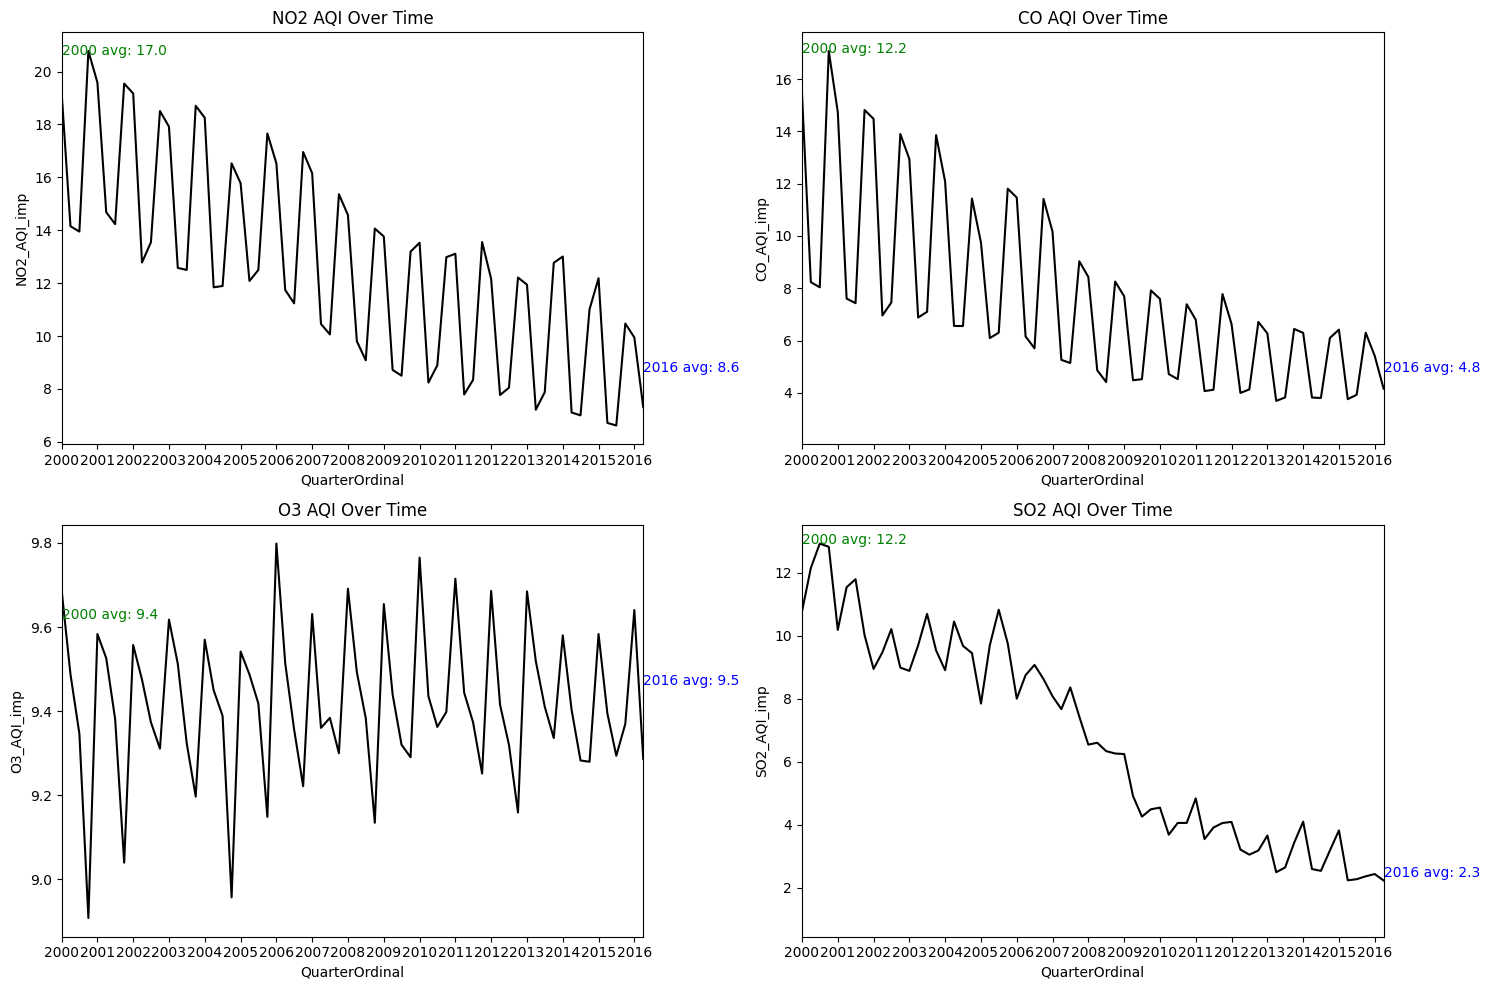

In [4]:
# Step 1: Aggregate AQI values at quarter level
quarterly_df = (
    df.groupby(['Year', 'Quarter'])
      [['NO2_AQI_imp', 'CO_AQI_imp', 'O3_AQI_imp', 'SO2_AQI_imp']]
      .mean()
      .reset_index()
)

# Step 2: Create datetime column for quarter start
quarterly_df['QuarterStart'] = pd.PeriodIndex.from_fields(
    year=quarterly_df['Year'],
    quarter=quarterly_df['Quarter'],
    freq='Q'
).to_timestamp()

# Step 3: Create ordinal version for regression
quarterly_df['QuarterOrdinal'] = quarterly_df['QuarterStart'].map(lambda x: x.toordinal())

# Step 4: Compute start and end year averages
start_year = quarterly_df['Year'].min()
end_year = quarterly_df['Year'].max()

start_avg = quarterly_df[quarterly_df['Year'] == start_year].mean(numeric_only=True)
end_avg = quarterly_df[quarterly_df['Year'] == end_year].mean(numeric_only=True)

# Step 5: Plot with trend lines and annotations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
pollutants = ['NO2_AQI_imp', 'CO_AQI_imp', 'O3_AQI_imp', 'SO2_AQI_imp']
titles = ['NO2 AQI Over Time', 'CO AQI Over Time', 'O3 AQI Over Time', 'SO2 AQI Over Time']

for ax, pollutant, title in zip(axs.flat, pollutants, titles):
    # Regression line using ordinal x-axis
    sns.regplot(
        data=quarterly_df,
        x='QuarterOrdinal',
        y=pollutant,
        ax=ax,
        scatter=False,
        line_kws={'color': 'red'}
    )

    # Actual AQI line using datetime x-axis
    ax.plot(quarterly_df['QuarterStart'], quarterly_df[pollutant], label='Quarterly AQI', color='black')

    # Format x-axis with year ticks
    ax.set_xlim([quarterly_df['QuarterStart'].min(), quarterly_df['QuarterStart'].max()])
    ax.xaxis.set_major_locator(mpl.dates.YearLocator())
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

    ax.set_title(title)

    # Get y-axis limits for positioning
    y_top = ax.get_ylim()[1]

    # Annotate start-year value at top of plot
    ax.text(quarterly_df['QuarterStart'].min(), y_top * 0.98,
            f'{start_year} avg: {start_avg[pollutant]:.1f}',
            color='green', ha='left', va='top')

    # Annotate end-year value near actual line
    ax.text(quarterly_df['QuarterStart'].max(), end_avg[pollutant],
            f'{end_year} avg: {end_avg[pollutant]:.1f}', color='blue')

plt.tight_layout()
plt.show()

From the quarterly trend chart:

* **NO₂, SO₂, and CO show a clear downward trend** over the period.
  * Comparing **2000 to 2016**:
    * **NO₂ AQI** annual mean drops by roughly **50%**.
    * **CO AQI** annual mean drops by about **60%**.
    * **SO₂ AQI** annual mean drops by just over **80%**.
  * This reflects cleaner combustion technologies, fuel regulations, and tighter air quality standards, leading to a decrease in pollution levels.
* **O₃ (ozone)** behaves differently:
  * Its long-term average is relatively stable and even shows a small **2% increase** from 2000 to 2016.
  * Ozone chemistry is complex and influenced by other external factors, which explains why it doesn’t simply mirror NO₂ and CO declines. More data on meteorological conditions and solar radiation would be needed to assess Ozone patterns.

  On the basis of this data, Hypothesis 1 is (mostly) proven - we have successfully reduced direct pollution over the timeframe. Secondary pollutioin, ozone, has not and requires a separate analysis to determine the causation.

## Hypothesis 2 - certain states will improved pollution levels more than others.

Next, we explore geographic differences:

* Look at changes in AQI at state level
* Identify the top 10 states with the highest AQI levels.
* Visualise these relative improvements.

To do this, we'll merge in the now-separate location data and then calculate average improvements at a state level and map them to illustrate most improved states.

In [ ]:
#bring the location data file into the notebook
loc = pd.read_csv("location_data.csv")       # contains SiteNumber, State, etc.

# Clean join key
df['Site Num'] = df['Site Num'].astype(str).str.strip()
loc['Site Num'] = loc['Site Num'].astype(str).str.strip()

# Deduplicate location file
loc_clean = loc.drop_duplicates(subset='Site Num')

# Merge in location info
df = df.merge(loc_clean[['Site Num','State','County']], on='Site Num', how='left')


In [ ]:
# Merge State and County into main pollution dataset
df = df.merge(loc_clean[['Site Num','State','County']], on='Site Num', how='left')

# Confirm row count remains stable (~1.75M), as previous attempts caused data explosion
print(len(df))  # Should still be around 1,750,000


1746661


In [9]:
# Merge State and County into main pollution dataset
df = df.merge(loc_clean[['Site Num','State','County']], on='Site Num', how='left')

# Confirm row count remains stable (~1.75M)
print(len(df))  # Should still be around 1,750,000

1746661


In [11]:
df.head()

,Unnamed: 0,Site Num,City,Date Local,NO2 Mean (ppb),NO2 1st Max Value (ppb),NO2 1st Max Hour,NO2 AQI,O3 Mean (ppm),O3 1st Max Value (ppm),...,CO_AQI_imp,NO2_AQI_imp,Year,Quarter,DayOfWeek,County_State,State_x,County_x,State_y,County_y
0,0,3002,Phoenix,2000-01-01,19.04,49.0,19,46,0.02,0.04,...,47.73,17.96,2000,1,Saturday,"Maricopa, Arizona",Arizona,Maricopa,Arizona,Maricopa
1,1,3002,Phoenix,2000-01-01,19.04,49.0,19,46,0.02,0.04,...,25.00,17.96,2000,1,Saturday,"Maricopa, Arizona",Arizona,Maricopa,Arizona,Maricopa
2,2,3002,Phoenix,2000-01-01,19.04,49.0,19,46,0.02,0.04,...,47.73,17.96,2000,1,Saturday,"Maricopa, Arizona",Arizona,Maricopa,Arizona,Maricopa
3,3,3002,Phoenix,2000-01-01,19.04,49.0,19,46,0.02,0.04,...,25.00,17.96,2000,1,Saturday,"Maricopa, Arizona",Arizona,Maricopa,Arizona,Maricopa
4,4,3002,Phoenix,2000-01-02,22.96,36.0,19,34,0.01,0.03,...,18.18,21.66,2000,1,Sunday,"Maricopa, Arizona",Arizona,Maricopa,Arizona,Maricopa


In [10]:
# TEST on 10k rows
test_group = (
    df.head(10000)
      .groupby(['State','County','Year'])
      [['NO2_AQI_imp','SO2_AQI_imp','CO_AQI_imp']]
      .mean()
      .reset_index()
)
print(len(test_group))  # sanity check

KeyError: 'State'

---
# Section 7 – Correlation Heatmap (Pollutants & AQI)

In this final section, we:

* Build a correlation matrix for:
  * Pollutant means (`NO2 Mean`, `O3 Mean`, `SO2 Mean`, `CO Mean`)
  * Their corresponding AQI fields (`NO2 AQI`, `O3 AQI`, `SO2 AQI`, `CO AQI`)
* Visualise the correlations using a Seaborn heatmap.


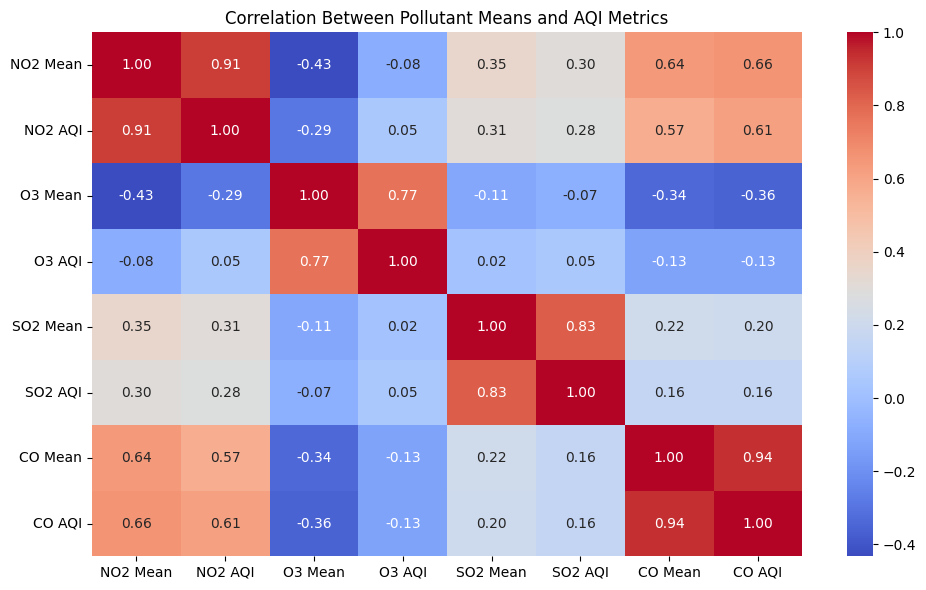

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
NO2 Mean,1.000000,0.905418,-0.432650,-0.082361,0.348186,0.295347,0.641828,0.661031
NO2 AQI,0.905418,1.000000,-0.291720,0.049027,0.305201,0.281377,0.566264,0.614445
O3 Mean,-0.432650,-0.291720,1.000000,0.768771,-0.110401,-0.070859,-0.339426,-0.355314
O3 AQI,-0.082361,0.049027,0.768771,1.000000,0.015523,0.051973,-0.129736,-0.130092
SO2 Mean,0.348186,0.305201,-0.110401,0.015523,1.000000,0.828354,0.215216,0.204040
SO2 AQI,0.295347,0.281377,-0.070859,0.051973,0.828354,1.000000,0.156616,0.157649
CO Mean,0.641828,0.566264,-0.339426,-0.129736,0.215216,0.156616,1.000000,0.936889
CO AQI,0.661031,0.614445,-0.355314,-0.130092,0.204040,0.157649,0.936889,1.000000


In [16]:
pollutant_cols = [
    "NO2 Mean", "NO2 AQI",
    "O3 Mean", "O3 AQI",
    "SO2 Mean", "SO2 AQI",
    "CO Mean", "CO AQI"
]

corr = df[pollutant_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollutant Means and AQI Metrics")
plt.tight_layout()
plt.show()

corr


The correlation matrix shows:

* **Strong positive correlations between each pollutant and its own AQI:**
  * `NO2 Mean` vs `NO2 AQI` ≈ **0.91**
  * `O3 Mean` vs `O3 AQI` ≈ **0.77**
  * `SO2 Mean` vs `SO2 AQI` ≈ **0.83**
  * `CO Mean` vs `CO AQI` ≈ **0.94**
  * This confirms that the AQI fields behave as expected and can be trusted as summarised air quality indicators (where present).
* **Notable cross-pollutant relationships:**
  * `NO2 Mean` and `CO Mean` have a **moderately strong positive correlation** (~**0.64**), reflecting shared sources such as vehicle emissions.
  * `NO2 Mean` and `O3 Mean` are **moderately negatively correlated** (~**-0.43**), aligning with what was highlted in the earlier scatter plot.
  * SO₂ is more weakly correlated with other pollutants, suggesting different sources or regional behaviour.

This heatmap helps identify which pollutants drive overall air quality and where redundancies or strong dependencies exist.


---
# Conclusions

Based on this exploratory data analysis of US air pollution (2000–2016):

### 1. Long-Term Trends

* **NO₂, SO₂, and CO have declined substantially over time**:
  * NO₂ mean levels fell by roughly **46%** (2000 → 2015).
  * SO₂ mean levels fell by nearly **80%** over the same period.
  * CO mean levels decreased by about **50%**.
* These improvements strongly suggest:
  * the impact of stricter emission standards,
  * improved fuel quality,
  * and wider adoption of cleaner technologies.
* **O₃ (ozone)** remains relatively stable and slightly higher (~**+9%**) over the same period, reflecting the complexity of ozone formation.


### 2. Geographic Differences

* Some states (e.g., **Colorado**, **Arizona**, **Massachusetts**, **New Jersey**, **New York**) exhibit **higher average NO₂ levels** (around **18–20 ppb**).
* Others, including **Tennessee**, **South Carolina**, **Hawaii**, **Wyoming**, and **North Dakota**, show **much lower levels** (below **5 ppb**).
* This demonstrates:
  * strong urban vs rural differences,
  * the effect of industrialisation and traffic density,
  * and possible regional policy differences.

### 4. Seasonal Patterns

* **NO₂ is clearly seasonal**:
  * Highest in **winter** (January, November, December).
  * Lowest in **summer** (June, July).
* This aligns with expectations:
  * Wintertime atmospheric conditions and heating-related emissions elevate NO₂.
  * Summer mixing and dispersion reduce NO₂ but may contribute to higher ozone episodes.

### 5. Relationships Between Pollutants

* NO₂ and CO are **moderately strongly correlated** (~**0.64**), supporting the idea of shared combustion-related sources such as traffic.
* NO₂ and O₃ have a **moderate negative correlation** (~**-0.43**), consistent with known urban ozone chemistry.
* Each pollutant’s mean is strongly correlated with its AQI, confirming the internal consistency between raw pollution measures and air quality indices.


Overall, this paints a clear story:

* Air quality in terms of NO₂, SO₂, and CO has **improved significantly** over the 16-year period.
* There are **distinct geographic hotspots** and clear **seasonal cycles**, especially for NO₂.

These findings can be further explored on the PowerBi dashboard, available at [(https://app.powerbi.com/links/ETRxXjNKcK?ctid=c233c072-135b-431d-af59-35e05babf941&pbi_source=linkShare&bookmarkGuid=d1378e0c-8c06-4e0c-be0d-c1043e83cdc8)]



